# Анализ продаж компьютерных игр

## Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо проанализировать исторические данные о продажах игр (до 2016 года включительно), в которые включены оценки пользователей и экспертов, информация о жанрах и платформах. 


### План работы

- Шаг 1. Просмотр данных и изучение общей информации
- Шаг 2. Подготовка данных


- Шаг 3. Проведение исследовательского анализа данных
    - Выбор платформы с наибольшими суммарными продажами.
    - Срок появления новых и исчезновения старых платформ.
    - Выбор актуального периода исследоавания.
    - Анализ лидирующих платформ.
    - Вычисление корреляции между продажами и отзывами пользователей и критиков.
    - Анализ показателей разных жанров видеоигр.


- Шаг 4. Составление портрета пользователя каждого региона (Северная Америка, Европа, Япония)
    - Самые популярные платформы (топ-5). 
    - Самые популярные жанры (топ-5). 
    - Влияние рейтинга ESRB на продажи в отдельном регионе.


- Шаг 5. Проверка гипотез
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



<b> Шаг 1. Открываю файл с данными и изучаю общую информацию </b>

In [1]:
# Импорт библиотек

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats as st

In [2]:
data = pd.read_csv('C:/datasets/5/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Получаю первичное представление о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b> Шаг 2. Подготавливаю данные </b>

Заменяю названия столбцов (привожу к нижнему регистру)

In [5]:
data.columns = data.columns.str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразовываю данные в нужные типы.

In [6]:
# Меняю формат пользовательского рейтинга с object на float, чтобы можно было сравнивать значения и выполнять арифметические операции с ними.
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Изменил формат пользовательского рейтинга с object на float, чтобы можно было в дальнейшем работать с данными значениями, сопоставлять их и выполнять с ними арифметические операции.

Обрабатываю пропуски

In [7]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


<b> О пропущенных значениях </b>

Я не хочу выбрасывать строки с пропусками в столбцах с оценками пользователей, критиков и возрастным рейтингом, потому что это сократит количество данных вдвое. Менять значение на среднее или медианное тоже не вижу смысла, поскольку оценки пользователей и критиков - вещь субъективная. Менять пропущенные значения на 0 тоже не вариант, потому что 0 равен худшей оценке. Выброшу их позже, если они помешают мне найти p-значение.

Строки с возрастным рейтингом ничем не получится заполнить, потому что это формат object, категориальная переменная. И их слишком много, чтобы выбрасывать.

Возникновение пропущенных значений, возможно, связано с технической ошибкой при копировании данных, потому что пропуски присутствуют не только в период зарождения видеоигровой индустрии, когда критиков и пользователей было намного меньше, но и после 2010-х, тогда пропусков тоже остаётся примерно половина от всех значений.

In [8]:
# Удаляю строки с пропущенными названиями

data = data.dropna(subset=['name']).reset_index(drop=True)

Удалил строки с пропущенными названиями, потому что не удалось восстановить, что это за игры.

In [9]:
print(data.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


Считаю суммарные продажи во всех регионах и записываю их в отдельный столбец.

In [10]:
data['sales_sum'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [11]:
# Меняю пропуски в столбце с возрастным рейтингом на "unknown"

data['rating'] = data['rating'].fillna('unknown')

In [12]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


<b> Шаг 3. Провожу исследовательский анализ данных </b>

Необходимо посмотреть, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

In [13]:
print(data.groupby('year_of_release')['name'].count().sort_values(ascending=False))

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: name, dtype: int64


Рынок видеоигр и сообщество геймеров возникли не так давно, поэтому количество значений в период с 1980 по 1993 гг. включительно не превышает двузначные числа. Данный период не является достаточно важным ещё и потому, что индустрия видеоигр только формировалась и многие закономерности современного рынка видеоигр могли появиться позднее.

In [14]:
# Строю сводную таблицу по годам и платформам.

platform_year_sales = data.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')

display(platform_year_sales)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


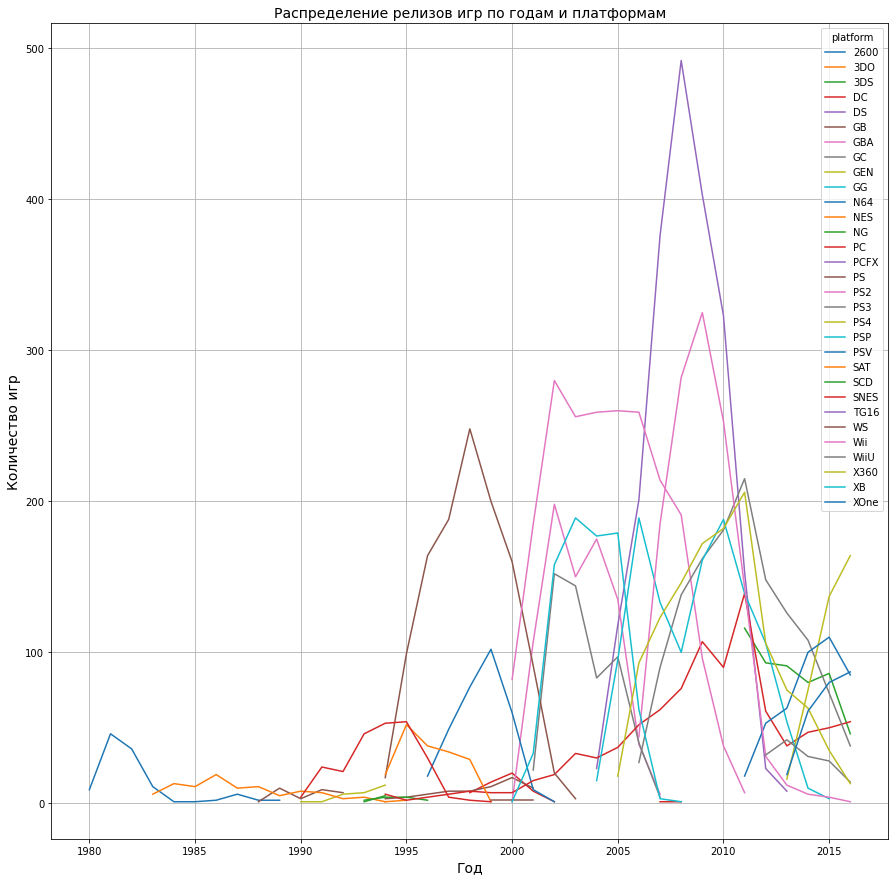

In [15]:
platform_year_sales.plot(figsize=(15,15), grid=True)

plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.title('Распределение релизов игр по годам и платформам', fontsize=14);

In [16]:
# Платформы с самой большой выручкой за игры

print(data.groupby('platform')['sales_sum'].sum().sort_values(ascending=False).head(6))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: sales_sum, dtype: float64


In [17]:
# Вычисляю число лет, на протяжении которых выходили игры для разных платформ.

print(platform_year_sales.count().sort_values(ascending=False).head(11))

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
dtype: int64


In [18]:
print(len(data['year_of_release'].unique()))

38


Игры для самых популярных платформ могут выходить на протяжении от 10 до 13 лет. Исключение составляет персональный компьютер, для которого игры выходят 26 лет из 37 

In [19]:
# Вычисляю медианное значение существования одной платформы.

print(platform_year_sales.count().median())

7.0


Платформы зачастую существуют около 7 лет, после чего их сменяют другие. Для такой быстроразвивающийся индустрии 3 года - наиболее подходящий актуальный период, поэтому, чтобы построить прогноз на 2017 год, берем данные за последние 3 года.

In [20]:
# Оставляю данные за последние 3 года

last_data = data.query('year_of_release >= 2014')

In [21]:
last_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  sales_sum        1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


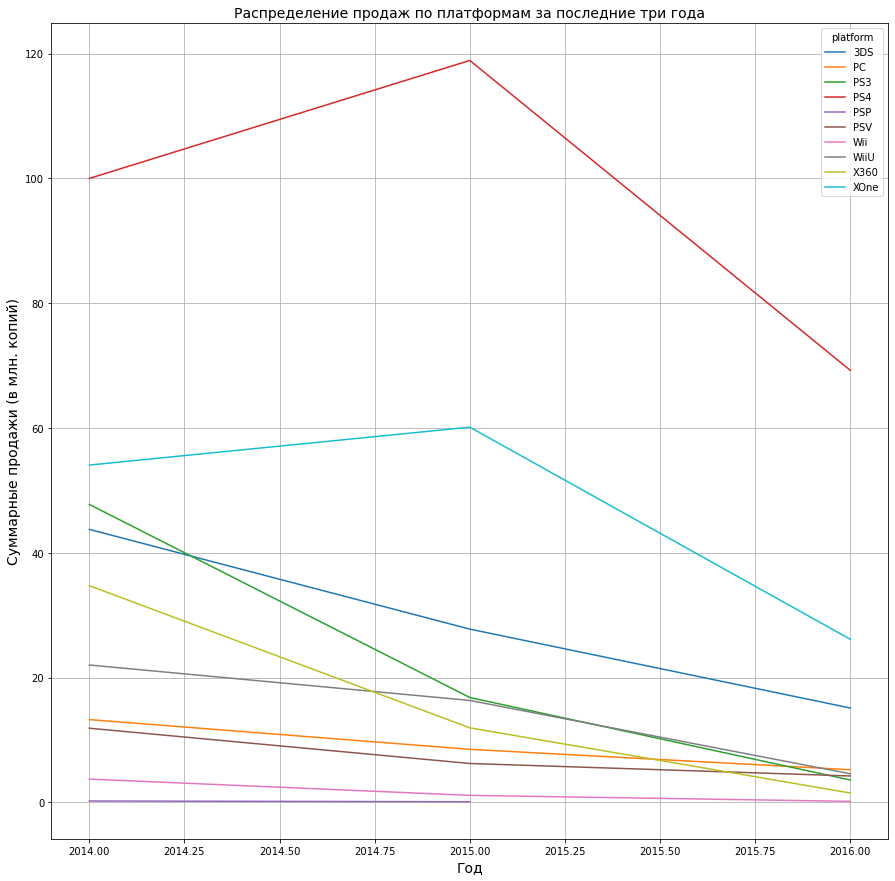

In [22]:
last_data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='sales_sum', 
    aggfunc='sum'
).plot(grid=True, figsize=(15,15))

plt.xlabel('Год', fontsize=14)
plt.ylabel('Суммарные продажи (в млн. копий)', fontsize=14)
plt.title('Распределение продаж по платформам за последние три года', fontsize=14);

In [23]:
# Распределение продаж по платформам за последние три года
display(last_data.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum'))

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


По числу продаж лидируют на 2016 год PS4, XOne и 3DS. При этом продажи на всех платформх падают по сравнению с 2015 годом, который оказался наиболее прибыльным для PS4 и XOne, их продажи возрастали с 2013 по 2015 годы и резко упали в 2016 году. XOne - на 34 миллиона копий и PS4 на 49,65 миллионов копий. Продажи 3DS падают с 2013 года. На четвертом месте в топ-5 платформ - PC, который в 2016 году также переживает спад 5,25 миллионов копий в 2016 году по сравнению с 8,52 миллионами проданных копий в 2015 году, при этом в отличие от PS4 и XOne продажи на PC падают с 2014 года. Замыкает топ-5 платформа WiiU, продажи на которую упали более чем в 3 раза, больше, чем у PS4, XOne, 3DS и PC: 4,6 миллионов проданных копий в 2016 году по сравнению с 16.35 миллионами в 2015 году; продажи WiiU на так же как и на 3DS и PC падают с 2014 года.

Таким образом, самые перспективные платформы на 2017 - **PS4**, **XOne** и **3DS**.

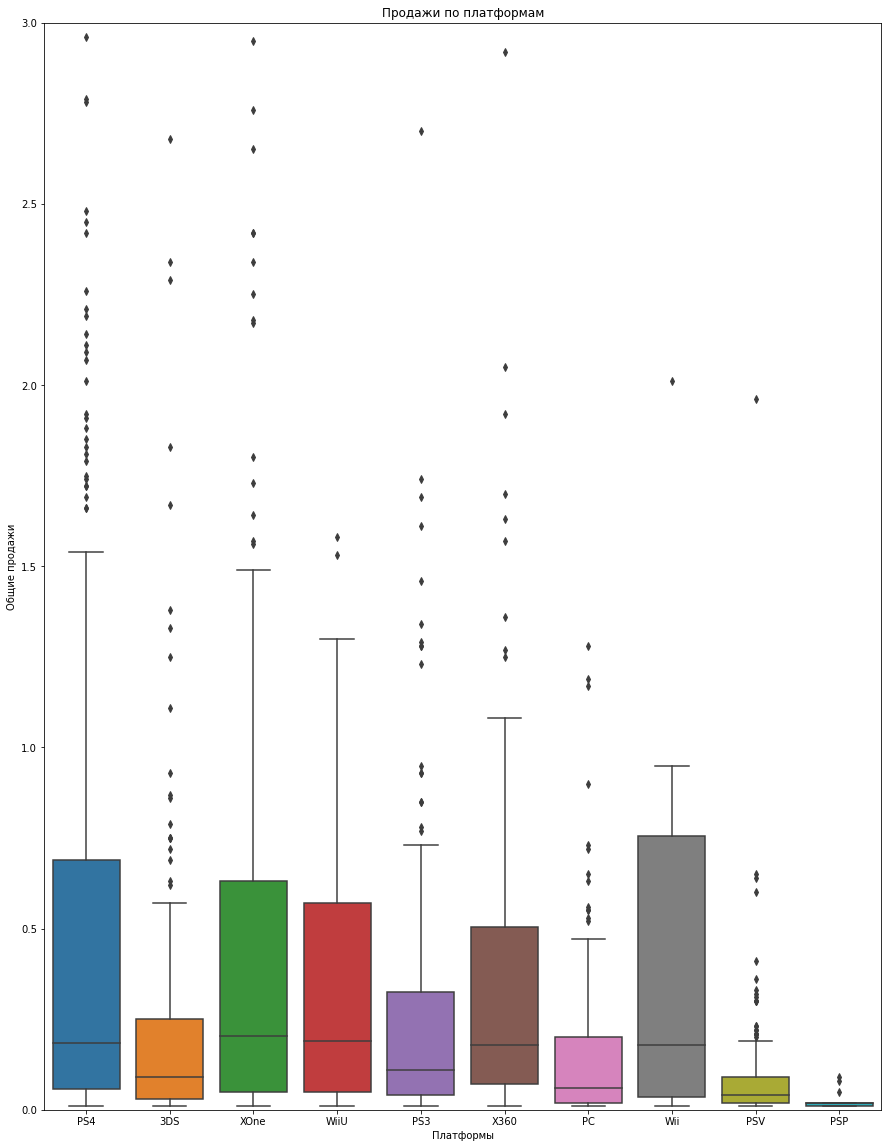

In [24]:
# Строю диаграмму размаха для всех платформ

plt.figure(figsize=(15, 20))
(sns.boxplot(data=last_data, y='sales_sum', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

Самой высокой вариативностью по числу проданных копий из топ-5 платформ обладает PS4, XOne и WiiU, вариантивность в количестве продаж у них значительно выше, чем у 3DS и PC. При этом у большинства платформ на графике медиана смещена первому квартилю, что говорит о том, что игры по своей успешности распределяются неравномерно и существует большое количество менее успешных игр и меньшее количество мегауспешных игр, которые оттягивают третий квартиль вверх.

<AxesSubplot:>

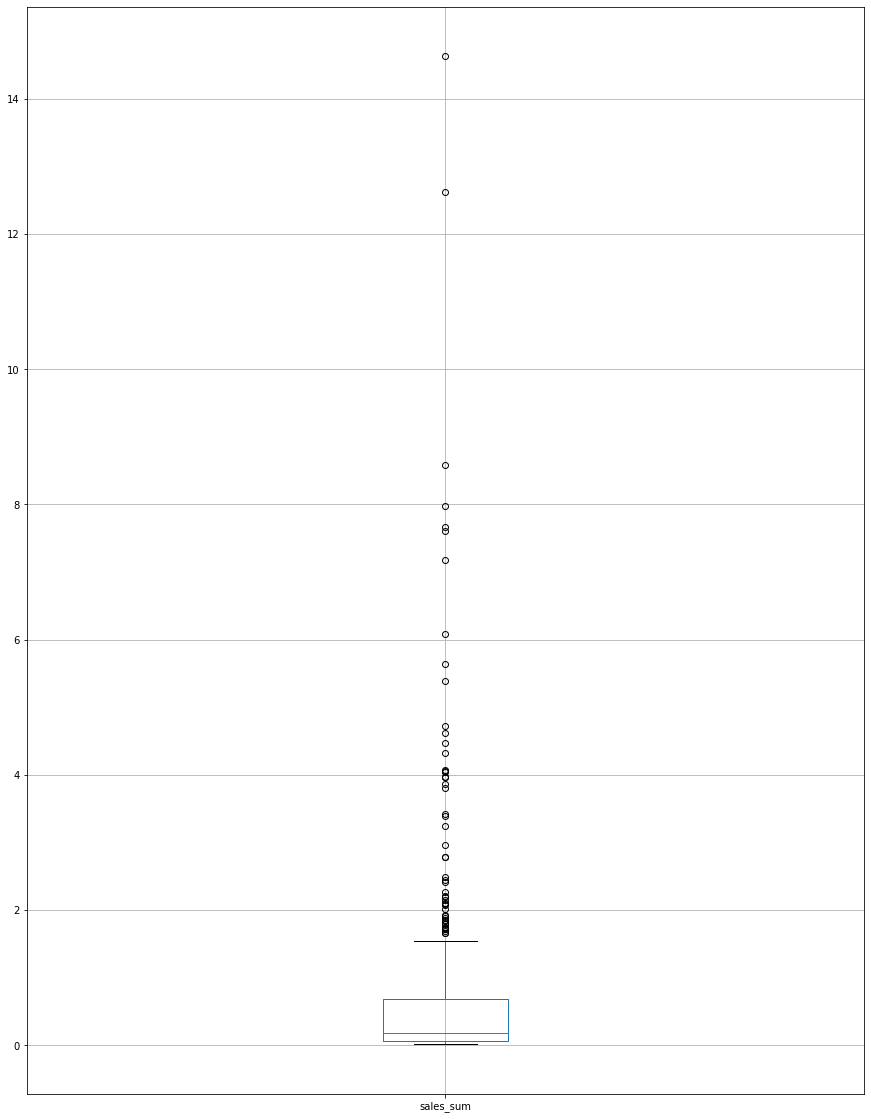

In [25]:
# Строю диаграмму размаха для PS4

last_data.query('platform == "PS4"').boxplot(column='sales_sum', figsize=(15,20))

In [26]:
print(last_data.query('platform == "PS4"')['sales_sum'].describe())

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: sales_sum, dtype: float64


75% выпущенных для PS4 игр по числу проданных копий не превышают 690 000, 50% не превышают 185 000

<AxesSubplot:>

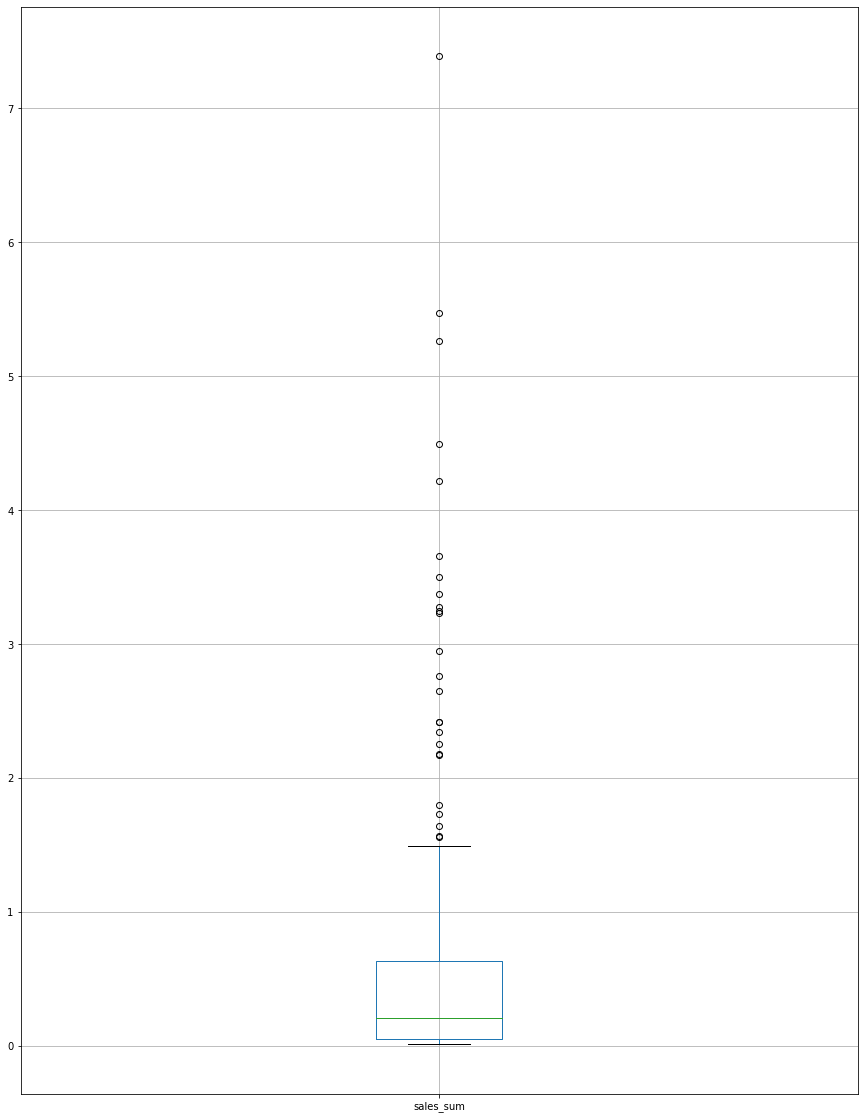

In [27]:
# Строю диаграмму размаха для XOne

last_data.query('platform == "XOne"').boxplot(column='sales_sum', figsize=(15,20))

In [28]:
print(last_data.query('platform == "XOne"')['sales_sum'].describe())

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: sales_sum, dtype: float64


75% выпущенных для XOne игр по числу проданных копий не превышают 632 500, 50% не превышают 205 000. Стоит отметить, что в данных об XOne значительно меньше выбросов и самая успешная игра по числу проданных копий в два раза уступает самой успешной игре на PS4.

<AxesSubplot:>

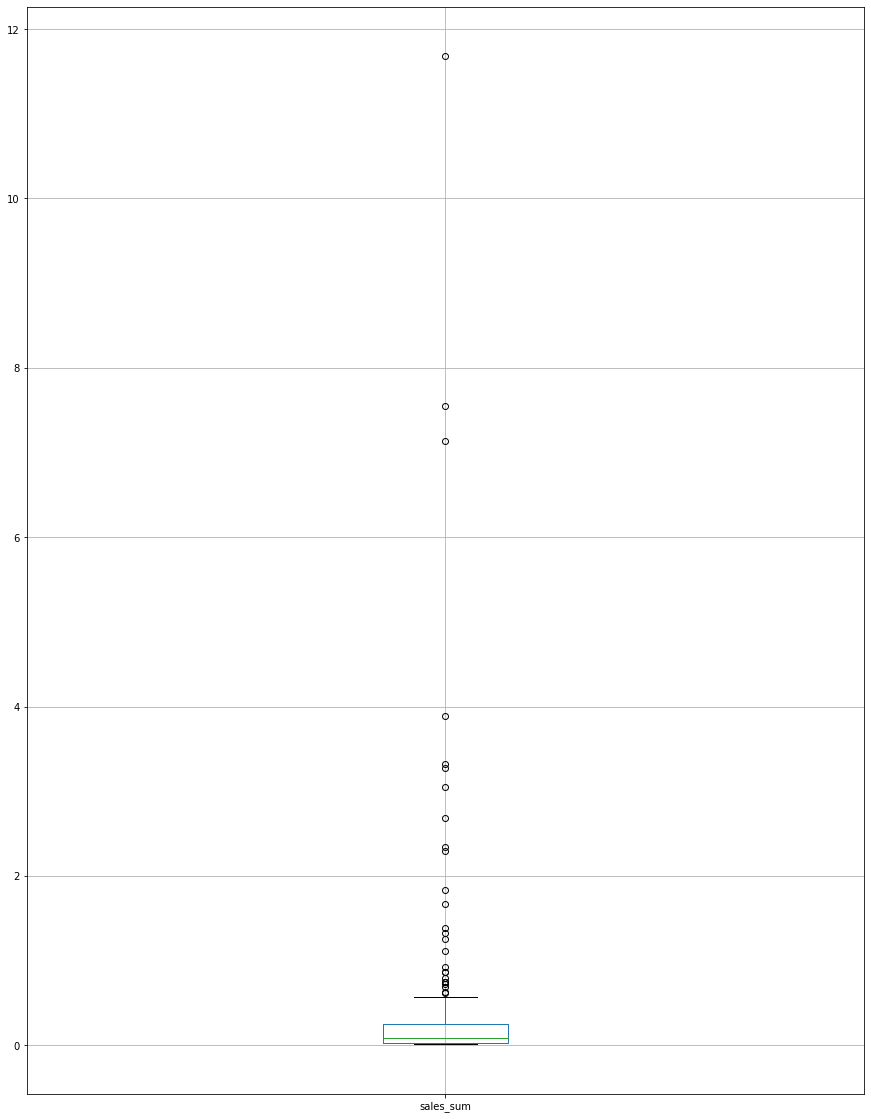

In [29]:
# Строю диаграмму размаха для 3DS

last_data.query('platform == "3DS"').boxplot(column='sales_sum', figsize=(15,20))

In [30]:
print(last_data.query('platform == "3DS"')['sales_sum'].describe())

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: sales_sum, dtype: float64


75% выпущенных для 3DS игр по числу проданных копий не превышают 250 000, 50% не превышают 90 000. Однако при менее высоких показателях большинства игр для 3DS были выпущены такие игры, которые по популярности не уступают релизам на PS4: максимальное значение проданных копий за одну игру - 11 680 000, что значительно превышает показатели самой успешной игры для XOne - 7 390 000.

Характерной чертой игровой отрасли является то, что в интервале с небольшими продажами находится очень много игр, однако существуют невероятно популярные игры (обозначенные в выбросах), продажи которых могут быть выше чем остальные игры вместе взятые. 

<AxesSubplot:xlabel='sales_sum', ylabel='critic_score'>

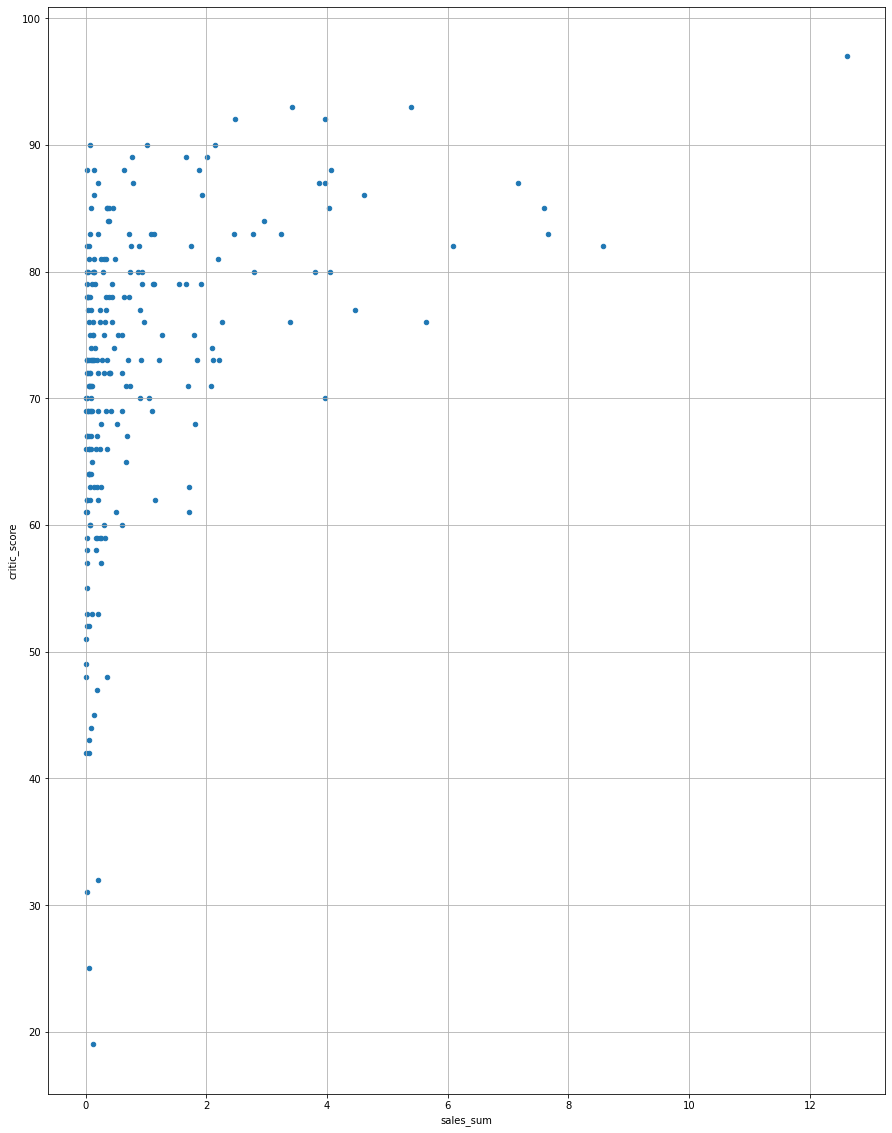

In [31]:
# Строю диаграмму рассеяния для оценок критиков и числа проданных копий по данным о релизах для PS4

last_data.query('platform == "PS4"').plot(x='sales_sum', y='critic_score', kind='scatter', grid=True, figsize=(15,20))

<AxesSubplot:xlabel='sales_sum', ylabel='user_score'>

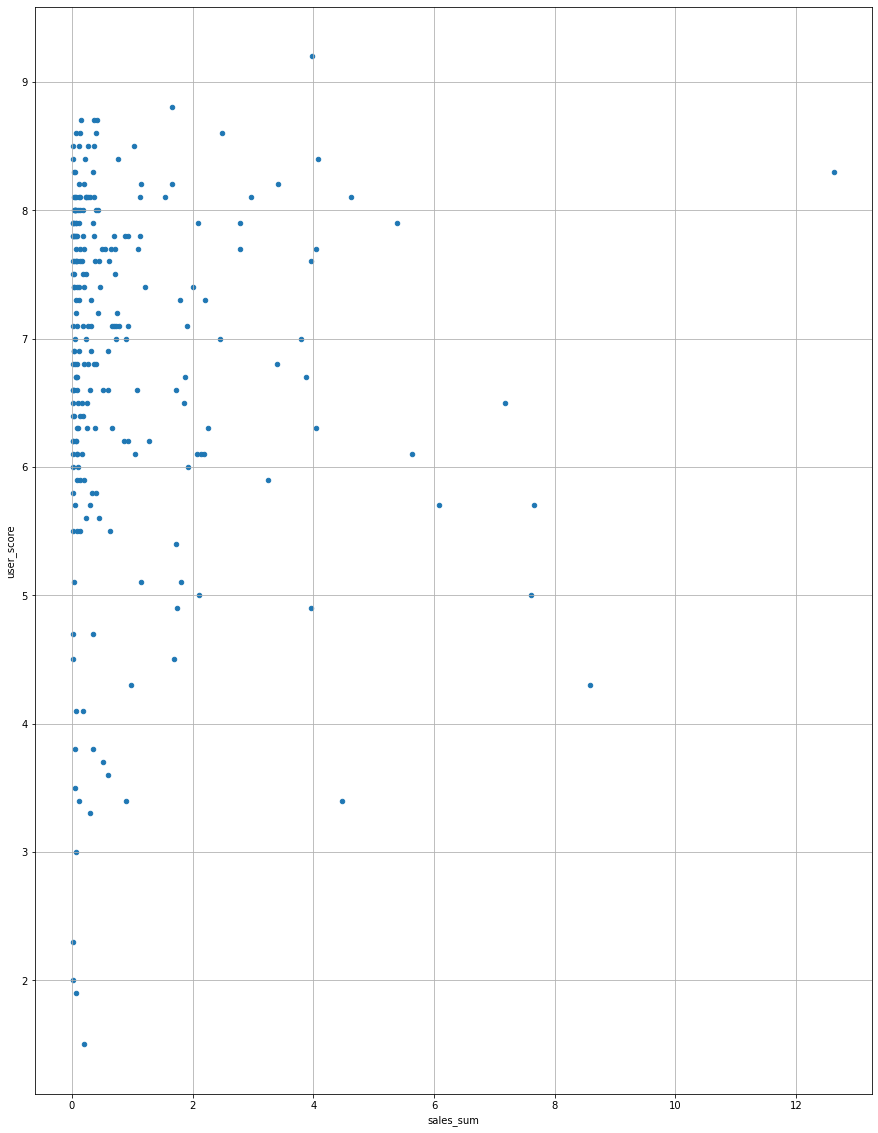

In [32]:
# Строю диаграмму рассеяния для оценок пользователей и числа проданных копий по данным о релизах для PS4

last_data.query('platform == "PS4"').plot(x='sales_sum', y='user_score', kind='scatter', grid=True, figsize=(15,20))

In [33]:
# Смотрю корреляцию между оценками критиков и числом проданных копий

print(last_data.query('platform == "PS4"')['sales_sum'].corr(last_data.query('platform == "PS4"')['critic_score']))

0.4026614106810408


In [34]:
# Смотрю корреляцию между оценками пользователей и числом проданных копий

print(last_data.query('platform == "PS4"')['sales_sum'].corr(last_data.query('platform == "PS4"')['user_score']))

-0.040131589472697266


Корреляции между оценками пользователей и числом проданных копий нет.

Существует слабая корреляция между оценками критиков и числом проданных копий. Коэффициент корреляции - 0.4. При этом важно отметить, что вторая по продажам на ps4 игра Grand Theft Auto V имеет самую высокую оценку критиков - 97 из 100.

<AxesSubplot:xlabel='sales_sum', ylabel='critic_score'>

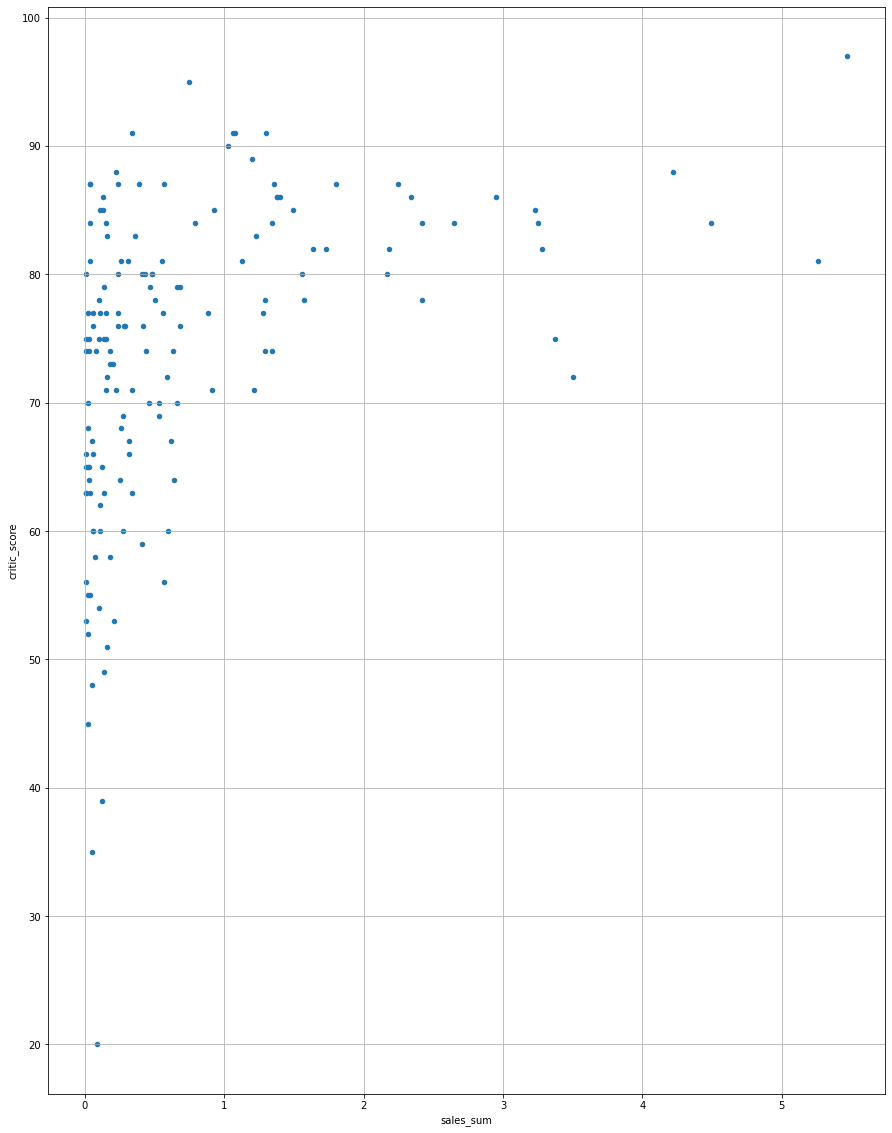

In [35]:
# Строю диаграмму рассеяния для оценок критиков и числа проданных копий по данным о релизах для XOne

last_data.query('platform == "XOne"').plot(x='sales_sum', y='critic_score', kind='scatter', grid=True, figsize=(15,20))

<AxesSubplot:xlabel='sales_sum', ylabel='user_score'>

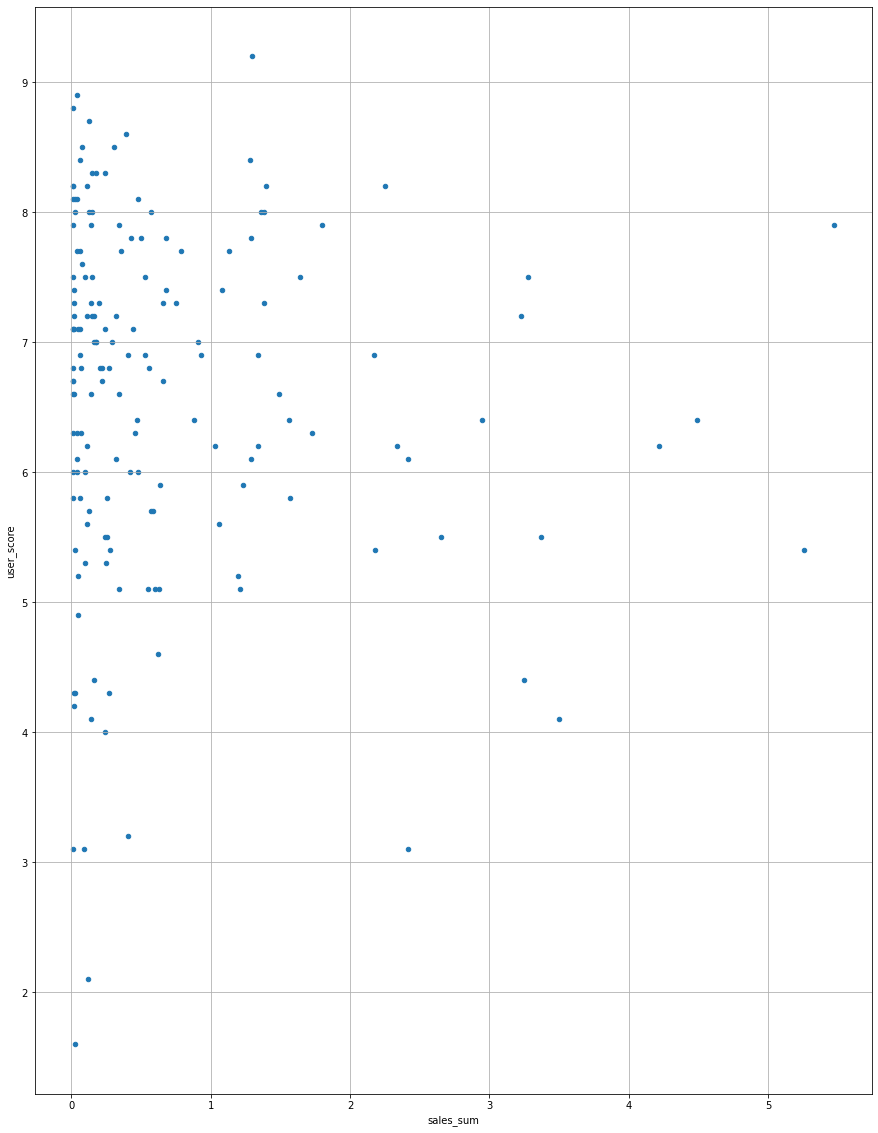

In [36]:
# Строю диаграмму рассеяния для оценок критиков и числа проданных копий по данным о релизах для XOne

last_data.query('platform == "XOne"').plot(x='sales_sum', y='user_score', kind='scatter', grid=True, figsize=(15,20))

In [37]:
# Смотрю корреляцию между оценками критиков и числом проданных копий

print(last_data.query('platform == "XOne"')['sales_sum'].corr(last_data.query('platform == "XOne"')['critic_score']))

0.428676943703332


In [38]:
# Смотрю корреляцию между оценками пользователей и числом проданных копий

print(last_data.query('platform == "XOne"')['sales_sum'].corr(last_data.query('platform == "XOne"')['user_score']))

-0.07038392806475817


Показатели корреляции в случае релизов для XOne совпадают с играми выпущенными для PS4:
- Корреляции между оценками пользователей и числом проданных копий нет.
- Существует слабая корреляция между оценками критиков и числом проданных копий. Коэффициент корреляции также составляет 0.4. 

<AxesSubplot:xlabel='sales_sum', ylabel='critic_score'>

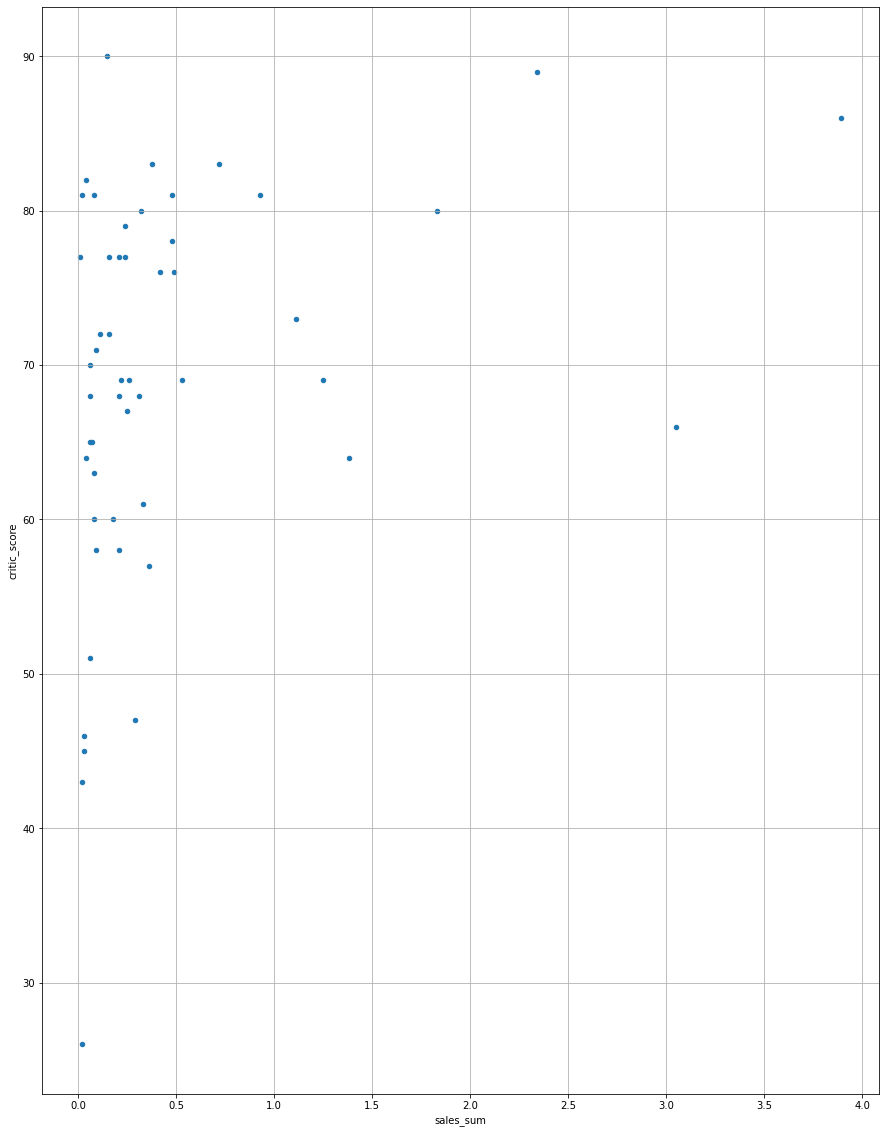

In [39]:
# Строю диаграмму рассеяния для оценок критиков и числа проданных копий по данным о релизах для 3DS

last_data.query('platform == "3DS"').plot(x='sales_sum', y='critic_score', kind='scatter', grid=True, figsize=(15,20))

<AxesSubplot:xlabel='sales_sum', ylabel='user_score'>

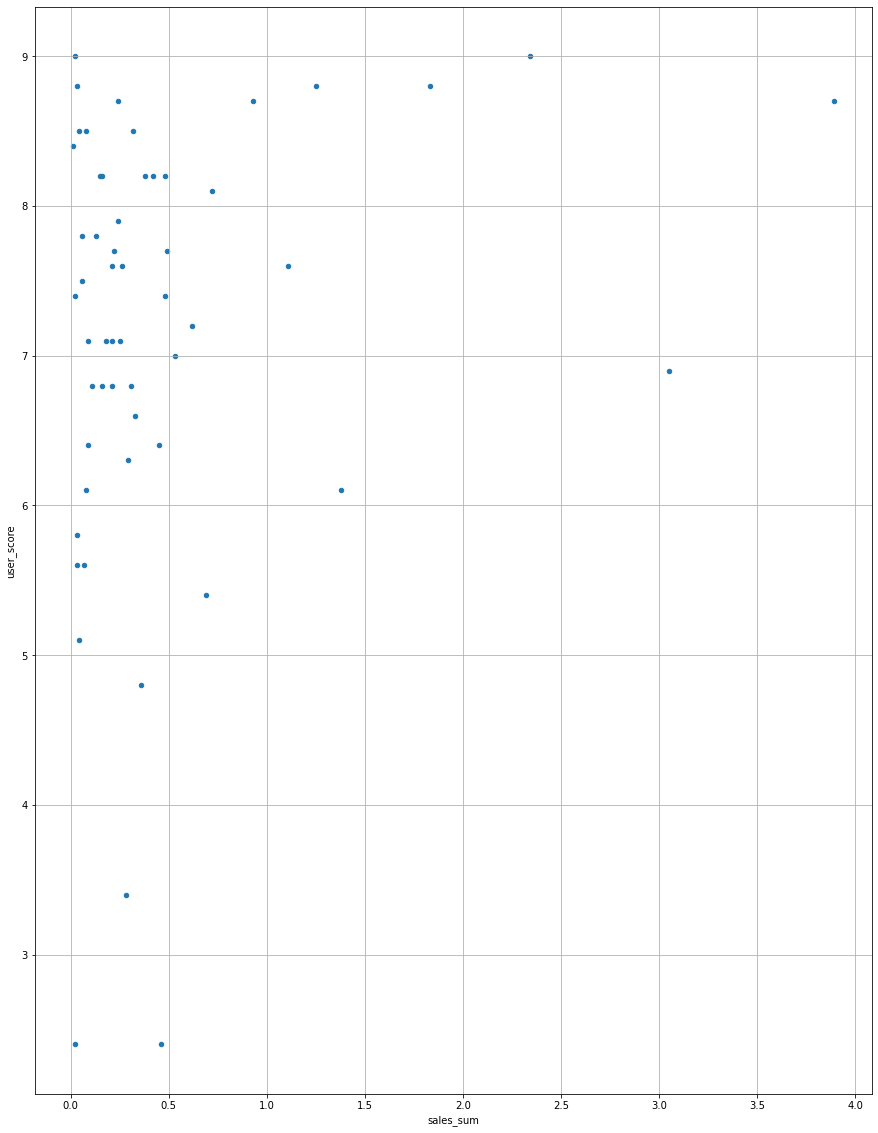

In [40]:
# Строю диаграмму рассеяния для оценок критиков и числа проданных копий по данным о релизах для 3DS

last_data.query('platform == "3DS"').plot(x='sales_sum', y='user_score', kind='scatter', grid=True, figsize=(15,20))

In [41]:
# Смотрю корреляцию между оценками критиков и числом проданных копий

print(last_data.query('platform == "3DS"')['sales_sum'].corr(last_data.query('platform == "3DS"')['critic_score']))

0.314117492869051


In [42]:
# Смотрю корреляцию между оценками пользователей и числом проданных копий

print(last_data.query('platform == "3DS"')['sales_sum'].corr(last_data.query('platform == "3DS"')['user_score']))

0.21519327185270273


Показатели корреляции в случае релизов для 3DS отличаются PS4 и XOne:

- Существует слабая корреляция между оценками пользователей и числом проданных копий. Коэффициент корреляции - 0.2. Компания Nintendo знаменита в видеоигровой индустрии тем, что ей удалось сформировать преданное сообщество игроков. Поэтому, возможно, что отличается именно сама пользовательская база. 


- Существует слабая корреляция между оценками критиков и числом проданных копий, причем она нииже, чем у PS4 и XOne. Коэффициент корреляции составляет 0.34.

In [43]:
# Смотрю корреляцию для оставшихся платформ

all_platforms = ['PS4', 'XOne', '3DS']

for index in last_data['platform'].unique():
    if index not in all_platforms:
        all_platforms.append(index)
        print(f'Корреляция между оценками пользователей и числом проданных копий на {index}:', last_data.loc[last_data['platform'] == index,'sales_sum'].corr(last_data.loc[last_data['platform'] == index, 'user_score']))
        print(f'Корреляция между оценками критиков и числом проданных копий на {index}:', last_data.loc[last_data['platform'] == index,'sales_sum'].corr(last_data.loc[last_data['platform'] == index, 'critic_score']))
        print()

Корреляция между оценками пользователей и числом проданных копий на WiiU: 0.40792645792170795
Корреляция между оценками критиков и числом проданных копий на WiiU: 0.37020141248088406

Корреляция между оценками пользователей и числом проданных копий на PS3: -0.16676141347662102
Корреляция между оценками критиков и числом проданных копий на PS3: 0.4465746049319071

Корреляция между оценками пользователей и числом проданных копий на X360: -0.13844457094566506
Корреляция между оценками критиков и числом проданных копий на X360: 0.5257228356581523

Корреляция между оценками пользователей и числом проданных копий на PC: -0.07159665703472452
Корреляция между оценками критиков и числом проданных копий на PC: 0.17463413769350034

Корреляция между оценками пользователей и числом проданных копий на Wii: 1.0
Корреляция между оценками критиков и числом проданных копий на Wii: nan

Корреляция между оценками пользователей и числом проданных копий на PSV: -0.16845504978064438
Корреляция между оценками

В случае всех этих платформ, кроме PSV и PS2, существует слабая корреляция между оценками критиков и числом проданных копий. При этом ближайшими платформами к PS4 и XOne по коэффициенту данной корреляции являются их консоли-"предшественники" PS3 и X360. 

Самые высокие коэффициенты корреляции между оценками пользователей и числом проданных копий можно наблюдать у консолей той же компании Nintendo. В отличие от других платформ в их случае можно говорить о существовании слабой корреляции: 
- на DS коэффициент корреляции - 0.2
- на WiiU самый высокий коэффициент корреляции между этими показателями - 0.4

<AxesSubplot:xlabel='sales_sum', ylabel='genre'>

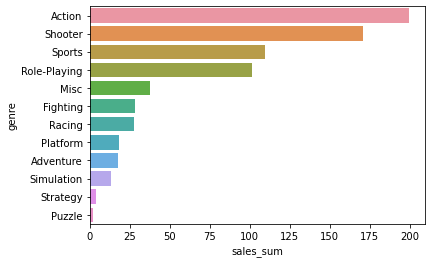

In [44]:
# Строю столбчатую диаграмму, чтобы посмотреть распределение продаж игр по жанрам

genre_sales_sum = last_data.pivot_table(index='genre', values='sales_sum', aggfunc='sum').sort_values(by='sales_sum', ascending=False)

sns.barplot(data=genre_sales_sum, y=genre_sales_sum.index, x=genre_sales_sum.sales_sum)

In [45]:
# Нахожу суммарное количество проданных игр по жанрам

last_data.groupby('genre')['sales_sum'].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: sales_sum, dtype: float64

<AxesSubplot:xlabel='sales_sum', ylabel='genre'>

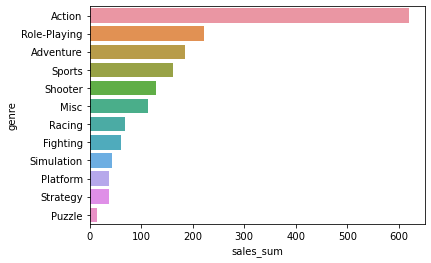

In [46]:
# Строю столбчатую диаграмму, чтобы посмотреть распределение количество опубликованных игр по жанрам

genre_sales_count = last_data.pivot_table(index='genre', values='sales_sum', aggfunc='count').sort_values(by='sales_sum', ascending=False)

sns.barplot(data=genre_sales_count, y=genre_sales_count.index, x=genre_sales_count.sales_sum)

In [47]:
# Нахожу количество опубликованных игр по жанрам

last_data.groupby('genre')['sales_sum'].count().sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: sales_sum, dtype: int64

In [48]:
# Нахожу медианное значение проданных игр для каждого жанра

last_data.groupby('genre')['sales_sum'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: sales_sum, dtype: float64

In [49]:
# Нахожу среднее значение проданных игр для каждого жанра

last_data.groupby('genre')['sales_sum'].mean().sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: sales_sum, dtype: float64

По медианному значению количества проданных копий жанры распределяются следующим образом:

- Самым продаваемым является жанр Shooter. Медианное значение количества продаж для данного жанра - 515 000, что превышает более чем в два раза медианные значения других жанров.

- На втором месте по медианному значению продаж жанр Sports. Медианное значение количества продаж для данного жанра - 180 000.

- На третьем месте по медианному значению продаж жанр Platform. Медианное значение количества продаж для данного жанра - 140 000.

По количеству выпущенных игр жанры распределяются следующим образом:
- Самым популярным среди разработчиков игр является жанр Action. В этом жанре за последние три года выпустили 619 игр. Благодаря этому жанр Action также лидирует по суммарному числу проданных игровых копий - 557 800 000

- На втором месте по популярности среди разработчиков - жанр Role-Playing. В этом жанре за последние три года выпустили 221 игру что почти в три раза уступает количеству игр в жанре Action. При этом по суммарному числу проданных игровых копий жанр Role-Playing занимает четвертое - 101 440 000.

- На третьем месте по популярности среди разработчиков - жанр Adventure. В этом жанре за последние три года выпустили 185 игр, что также в три раза меньше количества игр в жанре Action. При этом по суммарному числу проданных игровых копий жанр Adventure занимает девятое место - 17 550 000.    

- На четвертом месте по популярности среди разработчиков - жанр Sports. В этом жанре за последние три года выпустили 161 игру что также более чем в три раза меньше количества игр в жанре Action. При этом по суммарному числу проданных игровых копий жанр Sports занимает третье место - 109 480 000.

Аномальным является жанр Shooter, поскольку по популярности среди разработчиков он на пятом месте - 128 опубликованных в этом жанре игр. Однако по суммарному числу проданных копий игр этого жанра он располагается на втором месте - 170 940 000, под жанром Action, в котором опубликовано в 4 раза больше игр. 

<b> Шаг 4. Составляю портрет пользователя каждого региона </b>

<AxesSubplot:xlabel='na_sales', ylabel='platform'>

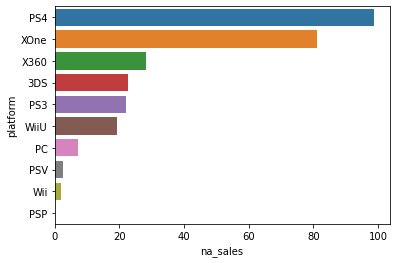

In [50]:
# Строю столбчатую диаграмму, чтобы посмотреть самые популярные платформы в Северной Америке

na_platform = last_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

sns.barplot(data=na_platform, y=na_platform.index, x=na_platform.na_sales)

In [51]:
# Смотрю самые популярные платформы в Северной Америке

last_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

<AxesSubplot:xlabel='eu_sales', ylabel='platform'>

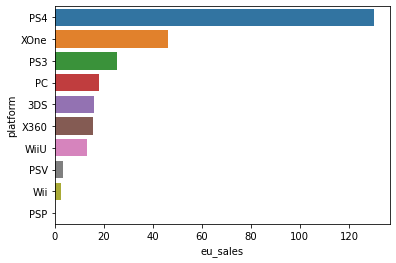

In [52]:
# Строю столбчатую диаграмму, чтобы посмотреть самые популярные платформы в Европе

eu_platform = last_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

sns.barplot(data=eu_platform, y=eu_platform.index, x=eu_platform.eu_sales)

In [53]:
# Смотрю самые популярные платформы в Европе

last_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

<AxesSubplot:xlabel='jp_sales', ylabel='platform'>

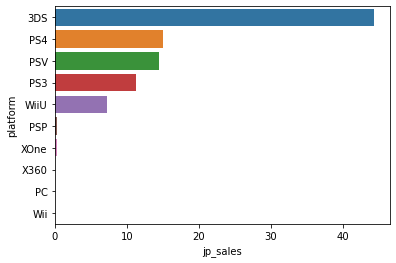

In [54]:
# Строю столбчатую диаграмму, чтобы посмотреть самые популярные платформы в Японии

jp_platform = last_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

sns.barplot(data=jp_platform, y=jp_platform.index, x=jp_platform.jp_sales)

In [55]:
# Смотрю самые популярные платформы в Японии

last_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Самой популярной платформой в Северной Америке является PS4 японской корпорации Sony. Для этой платформы было продано 98.61 млн. игровых копий. Покупатели в Северной Америке и Европе также отдают предпочтение и XOne, в отличие от и Японии, где эта платформа не входит в топ-5.

Самой популярной платформой в Европе является PS4 японской корпорации Sony. Для этой платформы было продано 130.04 млн. игровых копий.

Самой популярной платформой в Японии является 3DS японской корпорации Nintendo. Для этой платформы было продано 44.24 млн. игровых копий. При этом в Японии PC и XOne не входят в топ-5 платформ, в отличие от Европы и Северной Америки. Японцы отдают предпочтение платформам японского производства. Число продаж в Японии ниже, потому что значительно меньше население. 


<AxesSubplot:xlabel='na_sales', ylabel='genre'>

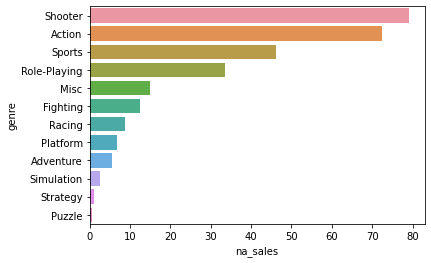

In [56]:
# Строю столбчатую диаграмму, чтобы посмотреть самые популярные жанры в Северной Америке

na_genre = last_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

sns.barplot(data=na_genre, y=na_genre.index, x=na_genre.na_sales)

In [57]:
# Смотрю самые популярные жанры в Северной Америке

last_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

<AxesSubplot:xlabel='eu_sales', ylabel='genre'>

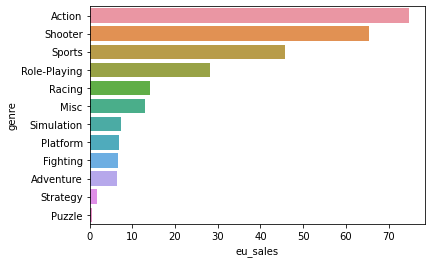

In [58]:
# Строю столбчатую диаграмму, чтобы посмотреть самые популярные жанры в Европе

eu_genre = last_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

sns.barplot(data=eu_genre, y=eu_genre.index, x=eu_genre.eu_sales)

In [59]:
# Смотрю самые популярные жанры в Европе

last_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

<AxesSubplot:xlabel='jp_sales', ylabel='genre'>

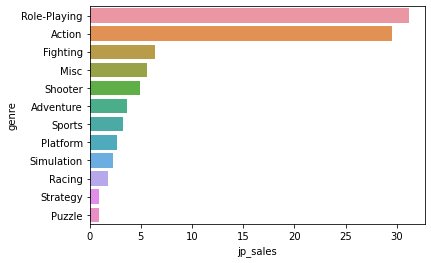

In [60]:
# Строю столбчатую диаграмму, чтобы посмотреть самые популярные жанры в Японии

jp_genre = last_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

sns.barplot(data=jp_genre, y=jp_genre.index, x=jp_genre.jp_sales)

In [61]:
# Смотрю самые популярные жанры в Японии

last_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

Топ-4 жанров в Европе и Северной Америке не отличается:
- Первое место в Северной Америке занимает жанр Shooter. Продано 79.02 млн. копий. В Европе первое место занимает жанр Action. Продано 74.68 млн. копий. 
- Второе место в Северной Америке занимает жанр Action. Продано 72.53 млн. копий. В Европе второе место занимает жанр Shooter. Продано 65.52 млн. копий.
- Третье место в Европе и Северной Америке занимает жанр Sports. В Северной Америке продано 46.13 млн. копий. В Европе продано 45.73 млн. копий.
- Четвертое место занимает жанр Role-Playing. В Северной Америке продано 33.47 млн. копий. В Европе продано 28.17 млн. копий.
Это совпадение можно объяснить сходством культур.

Топ-5 жанров в Японии значительно отличается от Европы и Северной Америки:
- Первое место занимает жанр Role-Playing, продано 31.16 млн. копий. Это можно объяснить тем, что в Японии очень популярен жанр CRPG, точнее его японский вариант.

- Второе место занимает жанр Action, который лидирует в Северной Америке и Европе, продано 29.58 млн. копий.  

- Третье место занимает жанр Fighting, который не входит в топ-5 в Северной Америке и Европе, продано 6.37 млн. копий.

- Четвертое место занимает жанр Misc, который занимает пятое место в Северной Америке и не входит в топ-5 в Европе, продано 5.61 млн. копий.

- Пятое место занимает жанр Shooter, который занимает первое место в Северной Америке и второе - в Европе, продано 4.87 млн. копий.

Интересно, что в топ-5 жанров всех регионов продажи жанров первого и второго мест всегда значительно больше остальных.

In [62]:
# Смотрю, как возрастной рейтинг влияет на число продаж в Северной Америке

last_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

<AxesSubplot:xlabel='na_sales', ylabel='rating'>

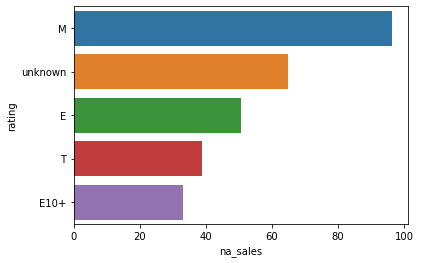

In [63]:
na_rating = last_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

sns.barplot(data=na_rating, y=na_rating.index, x=na_rating.na_sales)

In [64]:
# Смотрю, как возрастной рейтинг влияет на число продаж в Европе

last_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()

rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

<AxesSubplot:xlabel='eu_sales', ylabel='rating'>

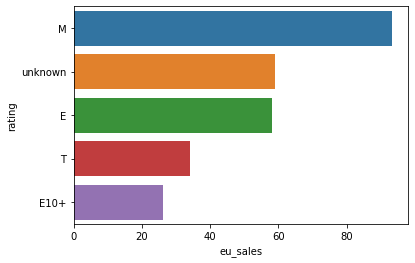

In [65]:
eu_rating = last_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

sns.barplot(data=eu_rating, y=eu_rating.index, x=eu_rating.eu_sales)

In [66]:
# Смотрю, как возрастной рейтинг влияет на число продаж в Японии

last_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()

rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='jp_sales', ylabel='rating'>

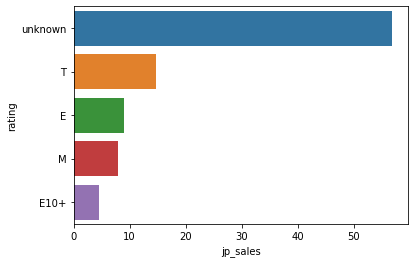

In [67]:
jp_rating = last_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

sns.barplot(data=jp_rating, y=jp_rating.index, x=jp_rating.jp_sales)

О влиянии возрастных рейтингов можно сказать следующее:

- В Северной Америке и Европе наибольшей популярностью пользуются игры с рейтингом "для взрослых" - M. В Северной Америке продано 96.42 млн. копий. В Европе продано 93.44 млн. копий.

- На втором месте и в Северной Америке и в Европе игры с неизвестным рейтингом - Е. В Северной Америке продано 64.72 млн. копий. В Европе продано 58.95 млн. копий.

- В Японии же игры с рейтингом "для взрослых" - M - пользуются значительно меньшей популярностью и стоят только на четвертом месте. Продано 8.01 млн. копий. Лидирующую позицию в Японии занимают игры с неизвестным рейтингом. Продано 56.90 млн. копий. На втором месте игры с рейтингом для подростков - Т. Продано 14.78 млн. копий. На третьем месте игры с рейтингом для всех - Е. Продано 8.94 млн. копий. При этом между нет существенного различия в числе проданных копий, в отличие от Северной Америке и Европы.

Таким образом, возрастные ограничения влияют только на продажи в Японии, хотя, более вероятно, что в Японии более популярен бренд Nintendo, который специализируется на играх с рейтингом Е и T, и тогда можно сказать, что возрастные ограничения влияют скорее на принятие решений в компаниях по разработке тех или иных игр.

Однако для формулирования точных выводов необходимо провести дополнительное исследование данных без такого значительного количества пропусков. Значение unknown может рассредотачиваться равномерно, а может тяготеть к какому-то конкретному возрастному рейтингу, и тогда выводы будут совершенно другими.

<b> Шаг 5. Проверяю гипотезы </b>

Первая двусторонняя гипотеза:

   - H0 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


   - H1 Средние пользовательские рейтинги платформ Xbox One и PC различаются.
   
Вторая двусторонняя гипотеза:

 - H0 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
 
 
 - H1 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы.

In [68]:
# Проверяю гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC

xbox_rating = last_data.query('platform == "XOne"')['user_score'].dropna()

pc_rating = last_data.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(xbox_rating, pc_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает, что вероятность случайно получить такое или большее различие равно почти 63%. Это  слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими рейтингами платформ Xbox One и PC.

In [69]:
# Проверяю гипотезу о различии средних пользовательских рейтингов жанров Action и Sports

action_rating = last_data.query('genre == "Action"')['user_score'].dropna()

sports_rating = last_data.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(action_rating, sports_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает, что вероятность случайно получить такое или большее различие крайне мала, поэтому можно говорить о том, что средние пользовательские рейтинги жанров Action и Sports действительно различаются.

<b> Шаг 6. Вывод </b>

<b> 1) Результаты исследовательского анализа данных. </b>

Анализ рынка видеоигр за 1980-2016 гг. показал следующее:

- Количество проданных копий видеоигр в период с 1980 по 1993 гг. включительно не превышает 60 000 000. К тому же данный период не является достаточно важным ещё и потому, что молодая индустрия видеоигр только формировалась в то время, и многие закономерности современного рынка видеоигр могли появиться позднее.

- Игры для самых популярных платформ могли выходить на протяжении от 10 до 13 лет. Исключение составляет персональный компьютер, для которого игры выходят 26 лет из 37.

- Платформы зачастую существуют около 7 лет, после чего их сменяют другие. Для такой быстроразвивающийся индустрии 3 года - наиболее подходящий актуальный период, поэтому, чтобы построить прогноз на 2017 год, берем данные за последние 3 года.

- По числу продаж лидируют на 2016 год PS4, XOne и 3DS. При этом продажи на всех платформх падают по сравнению с 2015 годом, который оказался наиболее прибыльным для PS4 и XOne, их продажи возрастали с 2013 по 2015 годы и резко упали в 2016 году. XOne - на 34 миллиона копий и PS4 на 49,65 миллионов копий. Продажи 3DS падают с 2013 года. На четвертом месте в топ-5 платформ - PC, который в 2016 году также переживает спад 5,25 миллионов копий в 2016 году по сравнению с 8,52 миллионами проданных копий в 2015 году, при этом в отличие от PS4 и XOne продажи на PC падают с 2014 года. Замыкает топ-5 платформа WiiU, продажи на которую упали более чем в 3 раза, больше, чем у PS4, XOne, 3DS и PC: 4,6 миллионов проданных копий в 2016 году по сравнению с 16.35 миллионами в 2015 году; продажи WiiU на так же как и на 3DS и PC падают с 2014 года.

Были также подробно проанализированны значения самых популярных платформ на 2016 год PS4, XOne, 3DS, PC, WiiU:

- Самой высокой вариативностью по числу проданных копий из топ-5 платформ обладает PS4, XOne и WiiU, вариантивность в количестве продаж у них значительно выше, чем у 3DS и PC. При этом у большинства платформ на графике медиана смещена первому квартилю, что говорит о том, что игры по своей успешности распределяются неравномерно и существует большое количество менее успешных игр и меньшее количество мегауспешных игр, которые оттягивают третий квартиль вверх.

- 75% выпущенных для PS4 игр по числу проданных копий не превышают 690 000, 50% не превышают 185 000.

- 75% выпущенных для XOne игр по числу проданных копий не превышают 632 500, 50% не превышают 205 000. Стоит отметить, что в данных об XOne значительно меньше выбросов и самая успешная игра по числу проданных копий в два раза уступает самой успешной игре на PS4.

- 75% выпущенных для 3DS игр по числу проданных копий не превышают 250 000, 50% не превышают 90 000. Однако при менее высоких показателях большинства игр для 3DS были выпущены такие игры, которые по популярности не уступают релизам на PS4: максимальное значение проданных копий за одну игру - 11 680 000, что значительно превышает показатели самой успешной игры для XOne - 7 390 000.

Исследование корреляции между оценками пользователей и критиков и продажами игр на для PS4 показало:

- Корреляции между оценками пользователей и числом проданных копий нет.

- Существует слабая корреляция между оценками критиков и числом проданных копий. Коэффициент корреляции - 0.4. При этом важно отметить, что вторая по продажам на ps4 игра Grand Theft Auto V имеет самую высокую оценку критиков - 97 из 100.

Показатели корреляции в случае релизов для XOne совпадают с играми выпущенными для PS4:

- Корреляции между оценками пользователей и числом проданных копий нет.

- Существует слабая корреляция между оценками критиков и числом проданных копий. Коэффициент корреляции также составляет 0.4.

Показатели корреляции в случае релизов для 3DS отличаются PS4 и XOne:

- Существует слабая корреляция между оценками пользователей и числом проданных копий. Коэффициент корреляции - 0.2. Компания Nintendo знаменита в видеоигровой индустрии тем, что ей удалось сформировать преданное сообщество игроков. Поэтому, возможно, что отличается именно сама пользовательская база.

- Существует слабая корреляция между оценками критиков и числом проданных копий, причем она нииже, чем у PS4 и XOne. Коэффициент корреляции составляет 0.34.

Исследование корреляции между оценками пользователей и критиков и продажами игр для остальных платформ показало следующие результаты:

- Корреляция между оценками пользователей и числом проданных копий на WiiU: 0.4079264579217078
- Корреляция между оценками критиков и числом проданных копий на WiiU: 0.370201412480884

- Корреляция между оценками пользователей и числом проданных копий на PS3: -0.16676141347662116
- Корреляция между оценками критиков и числом проданных копий на PS3: 0.44657460493190704

- Корреляция между оценками пользователей и числом проданных копий на X360: -0.138444570945665
- Корреляция между оценками критиков и числом проданных копий на X360: 0.5257228356581523

- Корреляция между оценками пользователей и числом проданных копий на PC: -0.07159665703472452
- Корреляция между оценками критиков и числом проданных копий на PC: 0.17463413769350036

- Корреляция между оценками пользователей и числом проданных копий на Wii: 1.0
- Корреляция между оценками критиков и числом проданных копий на Wii: nan

- Корреляция между оценками пользователей и числом проданных копий на PSV: -0.16845504978064446
- Корреляция между оценками критиков и числом проданных копий на PSV: 0.04266490657009526

Таким образом, в случае всех этих платформ, кроме PSV и PS2, существует слабая корреляция между оценками критиков и числом проданных копий. При этом ближайшими платформами к PS4 и XOne по коэффициенту данной корреляции являются их консоли-"предшественники" PS3 и X360.

Самые высокие коэффициенты корреляции между оценками пользователей и числом проданных копий можно наблюдать у консолей той же компании Nintendo. В отличие от других платформ в их случае можно говорить о существовании слабой корреляции:

- на DS коэффициент корреляции - 0.2
- на WiiU самый высокий коэффициент корреляции между этими показателями - 0.4

Исследование продаж игр по жанрам показало следующие результаты:

По медианному значению количества проданных копий жанры распределяются следующим образом:
По медианному значению количества проданных копий жанры распределяются следующим образом:

- Самым продаваемым является жанр Shooter. Медианное значение количества продаж для данного жанра - 515 000, что превышает более чем в два раза медианные значения других жанров.

- На втором месте по медианному значению продаж жанр Sports. Медианное значение количества продаж для данного жанра - 180 000.

- На третьем месте по медианному значению продаж жанр Platform. Медианное значение количества продаж для данного жанра - 140 000.

По количеству выпущенных игр жанры распределяются следующим образом:
- Самым популярным среди разработчиков игр является жанр Action. В этом жанре за последние три года выпустили 619 игр. Благодаря этому жанр Action также лидирует по суммарному числу проданных игровых копий - 557 800 000

- На втором месте по популярности среди разработчиков - жанр Role-Playing. В этом жанре за последние три года выпустили 221 игру что почти в три раза уступает количеству игр в жанре Action. При этом по суммарному числу проданных игровых копий жанр Role-Playing занимает четвертое - 101 440 000.

- На третьем месте по популярности среди разработчиков - жанр Adventure. В этом жанре за последние три года выпустили 185 игр, что также в три раза меньше количества игр в жанре Action. При этом по суммарному числу проданных игровых копий жанр Adventure занимает девятое место - 17 550 000.    

- На четвертом месте по популярности среди разработчиков - жанр Sports. В этом жанре за последние три года выпустили 161 игру что также более чем в три раза меньше количества игр в жанре Action. При этом по суммарному числу проданных игровых копий жанр Sports занимает третье место - 109 480 000.

Аномальным является жанр Shooter, поскольку по популярности среди разработчиков он на пятом месте - 128 опубликованных в этом жанре игр. Однако по суммарному числу проданных копий игр этого жанра он располагается на втором месте - 170 940 000, под жанром Action, в котором опубликовано в 4 раза больше игр. 

<b> 2) Результаты составления портрета пользователя для каждого региона (Северная Америка, Европа, Япония). </b>

Анализ популярности игровых платформ в регионах показал:

- Самой популярной платформой в Северной Америке является PS4 японской корпорации Sony. Для этой платформы было продано 98.61 млн. игровых копий. Покупатели в Северной Америке и Европе также отдают предпочтение и XOne, в отличие от и Японии, где эта платформа не входит в топ-5.

- Самой популярной платформой в Европе является PS4 японской корпорации Sony. Для этой платформы было продано 130.04 млн. игровых копий.

- Самой популярной платформой в Японии является 3DS японской корпорации Nintendo. Для этой платформы было продано 44.24 млн. игровых копий. При этом в Японии PC и XOne не входят в топ-5 платформ, в отличие от Европы и Северной Америки. Японцы отдают предпочтение платформам японского производства. Число продаж в Японии ниже, потому что значительно меньше население. 



Анализ популярности игровых жанров в регионах показал:

Топ-4 жанров в Европе и Северной Америке не отличается:
- Первое место в Северной Америке занимает жанр Shooter. Продано 79.02 млн. копий. В Европе первое место занимает жанр Action. Продано 74.68 млн. копий. 
- Второе место в Северной Америке занимает жанр Action. Продано 72.53 млн. копий. В Европе второе место занимает жанр Shooter. Продано 65.52 млн. копий.
- Третье место в Европе и Северной Америке занимает жанр Sports. В Северной Америке продано 46.13 млн. копий. В Европе продано 45.73 млн. копий.
- Четвертое место занимает жанр Role-Playing. В Северной Америке продано 33.47 млн. копий. В Европе продано 28.17 млн. копий.
Это совпадение можно объяснить сходством культур.

Топ-5 жанров в Японии значительно отличается от Европы и Северной Америки:
- Первое место занимает жанр Role-Playing, продано 31.16 млн. копий. Это можно объяснить тем, что в Японии очень популярен жанр CRPG, точнее его японский вариант.

- Второе место занимает жанр Action, который лидирует в Северной Америке и Европе, продано 29.58 млн. копий.  

- Третье место занимает жанр Fighting, который не входит в топ-5 в Северной Америке и Европе, продано 6.37 млн. копий.

- Четвертое место занимает жанр Misc, который занимает пятое место в Северной Америке и не входит в топ-5 в Европе, продано 5.61 млн. копий.

- Пятое место занимает жанр Shooter, который занимает первое место в Северной Америке и второе - в Европе, продано 4.87 млн. копий.

Интересно, что в топ-5 жанров всех регионов продажи жанров первого и второго мест всегда значительно больше остальных.


Анализ влияния возрастных рейтингов на популярность игр в разных регионах показал:

О влиянии возрастных рейтингов можно сказать следующее:

- В Северной Америке и Европе наибольшей популярностью пользуются игры с рейтингом "для взрослых" - M. В Северной Америке продано 96.42 млн. копий. В Европе продано 93.44 млн. копий.

- На втором месте и в Северной Америке и в Европе игры с неизвестным рейтингом - Е. В Северной Америке продано 64.72 млн. копий. В Европе продано 58.95 млн. копий.

- В Японии же игры с рейтингом "для взрослых" - M - пользуются значительно меньшей популярностью и стоят только на четвертом месте. Продано 8.01 млн. копий. Лидирующую позицию в Японии занимают игры с неизвестным рейтингом. Продано 56.90 млн. копий. На втором месте игры с рейтингом для подростков - Т. Продано 14.78 млн. копий. На третьем месте игры с рейтингом для всех - Е. Продано 8.94 млн. копий. При этом между нет существенного различия в числе проданных копий, в отличие от Северной Америке и Европы.

Таким образом, возрастные ограничения влияют только на продажи в Японии, хотя, более вероятно, что в Японии более популярен бренд Nintendo, который специализируется на играх с рейтингом Е и T, и тогда можно сказать, что возрастные ограничения влияют скорее на принятие решений в компаниях по разработке тех или иных игр.

Однако для формулирования точных выводов необходимо провести дополнительное исследование данных без такого значительного количества пропусков. Значение unknown может рассредотачиваться равномерно, а может тяготеть к какому-то конкретному возрастному рейтингу, и тогда выводы будут совершенно другими.

<b> 3) Результаты проверки гипотез: </b>

Первую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не удалось отвергнуть. Значение p-value показало, что вероятность случайно получить такое или большее различие равно почти 63%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими рейтингами платформ Xbox One и PC.

Вторую гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные также не удалось отвергнуть. Значение p-value показало, что вероятность случайно получить такое или большее различие крайне мала, поэтому можно говорить о том, что средние пользовательские рейтинги жанров Action и Sports действительно различаются.

